# 1. **`gdp_growth_trends.ipynb`**
   - **Problem**: Analyze GDP growth rates over time for top economies to identify economic trends.
   - **Dataset**: `world_gdp_data.csv`
   - **Tasks**: Calculate yearly growth rates, filter top 10 countries, visualize trends with line plots.
   - **Skills**: Time-series (`to_datetime`, `resample`), filtering (`query`), visualization (`df.plot`).
   - **Output**: `data/processed/gdp_growth_trends.png`, line plot PNG.


In [217]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [218]:
gdp = pd.read_csv("../data/raw/world_gdp_data.csv")
gdp.sample(5)

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
92,Lesotho,Annual GDP growth (percent change),-0.8,3.1,5.6,3.0,4.8,3.0,3.8,2.7,...,3.2,1.9,-2.7,-1.3,-2.0,-3.9,1.8,2.1,2.1,2.3
187,Yemen,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.0,-9.4,-5.1,0.8,2.1,-8.5,-1.0,1.5,-0.5,2.0
1,Albania,Annual GDP growth (percent change),2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,...,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.8,3.6,3.3
28,Cabo Verde,Annual GDP growth (percent change),5.3,8.5,2.8,9.5,3.8,8.6,2.9,4.3,...,0.9,4.3,4.6,3.7,6.9,-19.6,6.4,17.0,4.4,4.5
5,Antigua and Barbuda,Annual GDP growth (percent change),8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,...,3.8,5.5,3.1,6.8,4.3,-17.5,6.6,8.5,5.6,5.4


### Filter data.
1. the indicater is `Annual GDP growth (percent change)` so we need to calculate the growth rate for over the years. we need to sum the growth rate over the years for each country.
2. we need to filter the top 10 countries by Sum of GDP growth rate.



In [219]:
gdp['sum_gdp'] = gdp.loc[:, '1980':'2024'].sum(axis=1)

gdp.dropna(inplace=True)

filtered_gdp = gdp.sort_values(by='sum_gdp', ascending=False).head(10)

filtered_gdp


,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum_gdp
35,"China, People's Republic of",Annual GDP growth (percent change),7.9,5.1,9.0,10.8,15.2,13.5,8.9,11.7,...,6.9,6.9,6.8,6.0,2.2,8.4,3.0,5.0,4.2,400.2
101,Maldives,Annual GDP growth (percent change),18.8,7.9,7.5,4.4,17.4,13.8,8.6,8.9,...,6.3,7.2,8.1,6.9,-33.4,41.7,13.9,8.1,5.0,340.0
20,Bhutan,Annual GDP growth (percent change),5.0,13.6,8.2,7.3,7.6,4.3,8.0,20.2,...,7.4,6.3,3.8,4.4,-2.3,-3.3,4.8,5.3,3.0,299.8
185,Vietnam,Annual GDP growth (percent change),-3.5,5.8,8.2,7.1,8.4,5.6,3.4,2.5,...,6.7,6.9,7.5,7.4,2.9,2.6,8.0,4.7,5.8,282.8
73,India,Annual GDP growth (percent change),5.3,6.0,3.5,7.3,3.8,5.3,4.8,4.0,...,8.3,6.8,6.5,3.9,-5.8,9.1,7.2,6.3,6.3,275.0
150,Singapore,Annual GDP growth (percent change),10.1,10.8,7.1,8.6,8.8,-0.6,1.3,10.8,...,3.6,4.5,3.6,1.3,-3.9,8.9,3.6,1.0,2.1,265.7
86,"Korea, Republic of",Annual GDP growth (percent change),-1.6,7.2,8.3,13.4,10.6,7.8,11.3,12.7,...,2.9,3.2,2.9,2.2,-0.7,4.3,2.6,1.4,2.2,254.3
100,Malaysia,Annual GDP growth (percent change),7.4,6.9,5.9,6.3,7.8,-0.9,1.2,5.4,...,4.4,5.8,4.8,4.4,-5.5,3.3,8.7,4.0,4.3,246.9
165,Taiwan Province of China,Annual GDP growth (percent change),8.0,7.1,4.8,9.0,10.0,4.8,11.5,12.8,...,2.2,3.3,2.8,3.1,3.4,6.5,2.4,0.8,3.0,242.1
74,Indonesia,Annual GDP growth (percent change),9.9,7.6,2.2,4.2,7.6,3.9,7.2,6.6,...,5.0,5.1,5.2,5.0,-2.1,3.7,5.3,5.0,5.0,237.4


### Clean data
1. where gdp is not available then replace with mean of those country gdp

In [220]:
filtered_gdp.fillna(filtered_gdp.loc[:, '1980':'2024'].mean(), inplace=True)
filtered_gdp.set_index('country_name', inplace=True)
print(filtered_gdp.columns)
print(filtered_gdp.index)

filtered_gdp

Index(['indicator_name', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024', 'sum_gdp'],
      dtype='object')
Index(['China, People's Republic of', 'Maldives', 'Bhutan', 'Vietnam', 'India',
       'Singapore', 'Korea, Republic of', 'Malaysia',
       'Taiwan Province of China', 'Indonesia'],
      dtype='object', name='country_name')


,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum_gdp
country_name,,,,,,,,,,,,,,,,,,,,,
"China, People's Republic of",Annual GDP growth (percent change),7.9,5.1,9.0,10.8,15.2,13.5,8.9,11.7,11.2,...,6.9,6.9,6.8,6.0,2.2,8.4,3.0,5.0,4.2,400.2
Maldives,Annual GDP growth (percent change),18.8,7.9,7.5,4.4,17.4,13.8,8.6,8.9,8.7,...,6.3,7.2,8.1,6.9,-33.4,41.7,13.9,8.1,5.0,340.0
Bhutan,Annual GDP growth (percent change),5.0,13.6,8.2,7.3,7.6,4.3,8.0,20.2,15.1,...,7.4,6.3,3.8,4.4,-2.3,-3.3,4.8,5.3,3.0,299.8
Vietnam,Annual GDP growth (percent change),-3.5,5.8,8.2,7.1,8.4,5.6,3.4,2.5,5.1,...,6.7,6.9,7.5,7.4,2.9,2.6,8.0,4.7,5.8,282.8
India,Annual GDP growth (percent change),5.3,6.0,3.5,7.3,3.8,5.3,4.8,4.0,9.6,...,8.3,6.8,6.5,3.9,-5.8,9.1,7.2,6.3,6.3,275.0
Singapore,Annual GDP growth (percent change),10.1,10.8,7.1,8.6,8.8,-0.6,1.3,10.8,11.3,...,3.6,4.5,3.6,1.3,-3.9,8.9,3.6,1.0,2.1,265.7
"Korea, Republic of",Annual GDP growth (percent change),-1.6,7.2,8.3,13.4,10.6,7.8,11.3,12.7,12.0,...,2.9,3.2,2.9,2.2,-0.7,4.3,2.6,1.4,2.2,254.3
Malaysia,Annual GDP growth (percent change),7.4,6.9,5.9,6.3,7.8,-0.9,1.2,5.4,9.9,...,4.4,5.8,4.8,4.4,-5.5,3.3,8.7,4.0,4.3,246.9
Taiwan Province of China,Annual GDP growth (percent change),8.0,7.1,4.8,9.0,10.0,4.8,11.5,12.8,8.0,...,2.2,3.3,2.8,3.1,3.4,6.5,2.4,0.8,3.0,242.1


### Visualization for this statuistics

#### 1. Line chart for  GDP growth rate over time for top 10 countries.

- on x axis we have years
- on y axis we have GDP growth rate
- with line colors for each country

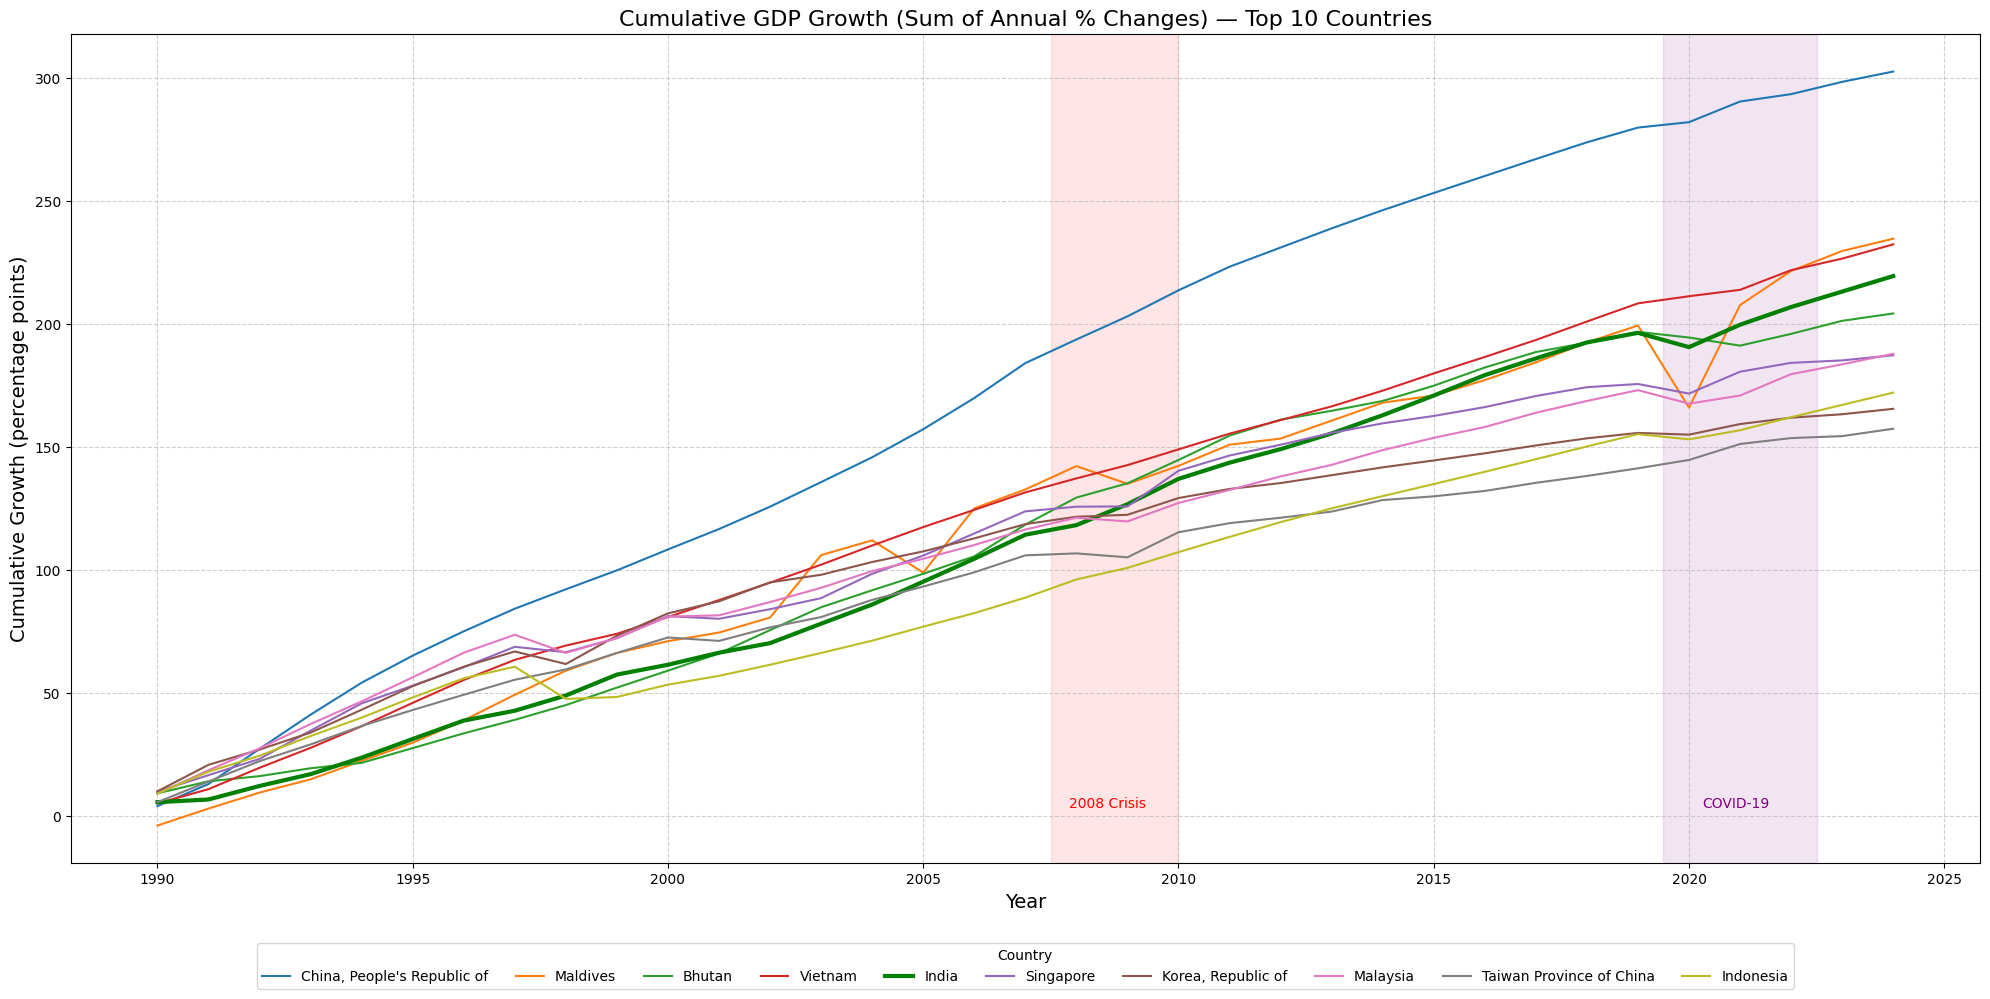

In [221]:
year_cols = [c for c in filtered_gdp.columns if c.isdigit()][10:]

top10_idx = filtered_gdp.nlargest(10, 'sum_gdp').index    # or .nlargest(10, '2024')

Y = filtered_gdp.loc[top10_idx, year_cols].T
Y.index = Y.index.astype(int)

Y_cum = Y.cumsum()

plt.figure(figsize=(20,10))
for country in Y_cum.columns:
    if country == 'India':
        plt.plot(Y_cum.index, Y_cum[country], label=country, linewidth=3, color='green')
    else:
        plt.plot(Y_cum.index, Y_cum[country], label=country)

plt.title("Cumulative GDP Growth (Sum of Annual % Changes) — Top 10 Countries", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cumulative Growth (percentage points)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(0.5, -0.16), loc="lower center", ncol=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Highlight 2008 Crisis
plt.axvspan(2007.5, 2010, color='red', alpha=0.1, label='2008 Crisis')

# Highlight COVID-19
plt.axvspan(2019.5, 2022.5, color='purple', alpha=0.1, label='COVID-19')

plt.text(2007.85, plt.ylim()[1]*0.01, '2008 Crisis', color='red')
plt.text(2020.25, plt.ylim()[1]*0.01, 'COVID-19', color='purple')

# save this into a png
# data/processed/gdp_growth_trends.png
plt.savefig("../data/processed/gdp_growth_trends.png", bbox_inches="tight", dpi=300)

# show Chart
plt.show()

### Here are **5 key economic events (1980–2024)** for each country

**China**

* 1980 — Special Economic Zones launched (Shenzhen, etc.)
* 1992 — Deng’s “Southern Tour” accelerates reforms
* 2001 — WTO accession
* 2008 — Massive stimulus during Global Financial Crisis
* 2015 — Stock-market turmoil & growth slowdown

**Maldives**

* 1989 — Economic liberalization (quotas lifted, private sector opened)
* 1990 — Record real GDP growth (\~16%)
* 2005 — Tsunami-related contraction; 2006 rebound
* 2011 — Reaches upper-middle-income status
* 2020 — COVID-19 tourism collapse & recovery measures

**Bhutan**

* 1986 — Chukha Hydropower Project commissioned
* 1993 — Royal Securities Exchange established
* 2006 — Tala Hydropower Project completed
* 2008 — Democratic transition; growth strategy shift
* 2023 — Graduation from UN Least Developed Country status

**Vietnam**

* 1986 — Đổi Mới reforms begin
* 1994 — US trade embargo lifted
* 2001 — US–Vietnam Bilateral Trade Agreement in force
* 2007 — WTO accession
* 2020 — EU–Vietnam Free Trade Agreement (EVFTA) takes effect

**India**

* 1991 — Liberalization, Privatization, Globalization (LPG) reforms
* 2005–2008 — High-growth run (near 9%)
* 2014 — Make in India / reform push begins
* 2016 — Demonetization
* 2017 — Goods & Services Tax (GST) rollout

**Singapore**

* 1985 — First post-independence recession; restructuring
* 1997 — Asian Financial Crisis resilience
* 2003 — SARS shock; healthcare & bio-med pivot (Biopolis era)
* 2010 — Integrated resorts open (tourism boost)
* 2020 — COVID fiscal support packages

**Korea, Republic of (South Korea)**

* 1988 — Seoul Olympics; global integration boost
* 1997 — Asian Financial Crisis & IMF program
* 2004 — Free-trade push (KORUS signed 2007; in force 2012)
* 2009 — Global crisis stimulus; rebound
* 2020 — Semiconductor-led export surge amid tech upcycle

**Malaysia**

* 1985–86 — Recession (commodity slump) and reforms
* 1998 — Capital controls during Asian Financial Crisis
* 2009 — New Economic Model announced
* 2015 — GST implemented (later replaced by SST 2018)
* 2020 — COVID Movement Control Order (MCO) & stimulus

**Taiwan (Province of China)**

* 1987 — Martial law lifted; liberalization accelerates
* 1990 — “Go South” policy (regional diversification) begins
* 2001 — WTO accession
* 2010 — ECFA trade pact with mainland
* 2020–2021 — Semiconductor boom amid global supply shifts

**Indonesia**

* 1998 — Fall of Suharto after Asian Financial Crisis; Reformasi begins
* 2001 — East Timor gains independence; political decentralization accelerates
* 2004 — First direct presidential election; Susilo Bambang Yudhoyono elected
* 2011 — Indonesia joins G20 as a rising emerging economy player
* 2019 — Joko Widodo re-elected; major push for infrastructure & new capital project